In [1]:
# standard python tools
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.io import imread

In [2]:
# make sure pyqae is available
import pyqae as pq
    
# check to see if it is running on pyspark
try:
    import pyspark
except ImportError:
    print('Using a fake spark backend for processing')

    import pyqae.simplespark as pyspark
    sc = pyspark.LocalSparkContext()

from pyqae.images import viz
# multidimensional distributed arrays
from pyqae.nd import paths_to_tiled_image, DiskMappedLazyImage, backends

In [3]:
base_path = "/Users/mader/Dropbox/4Quant/Projects/TumorSegmentation/10092825/"
little_image_list = glob(os.path.join(base_path,"0004_t1_tse_sag_384/*.tif"))
big_image_list = ['/Volumes/ExDisk/cor03639_CH2.tif']*5
really_big_image_list = ['/Volumes/TOSHIBA EXT/1616.tif']

In [4]:
help(DiskMappedLazyImage)

Help on class DiskMappedLazyImage in module pyqae.nd:

class DiskMappedLazyImage(builtins.object)
 |  A lazily read image which behaves as if it were a numpy array, fully serializable
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |      Get an item from the array through indexing.
 |      Supports basic indexing with slices and ints, or advanced
 |      indexing with lists or ndarrays of integers.
 |      Mixing basic and advanced indexing across axes is currently supported
 |      only for a single advanced index amidst multiple basic indices.
 |      Parameters
 |      ----------
 |      index : tuple of slices
 |          One or more index specifications
 |      Returns
 |      -------
 |      NDArray
 |  
 |  __init__(self, path, bckend)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 

/Users/mader/anaconda/lib/python3.5/site-packages/PIL/Image.py:2246: DecompressionBombWarning: Image size (687540942 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


<class 'pyqae.nd.LazyImagePillowBackend'> (256, 356) 23.0592839717865s for loading
<class 'pyqae.nd.LazyImageGDALBackend'> (256, 356) 0.12657380104064941s for loading


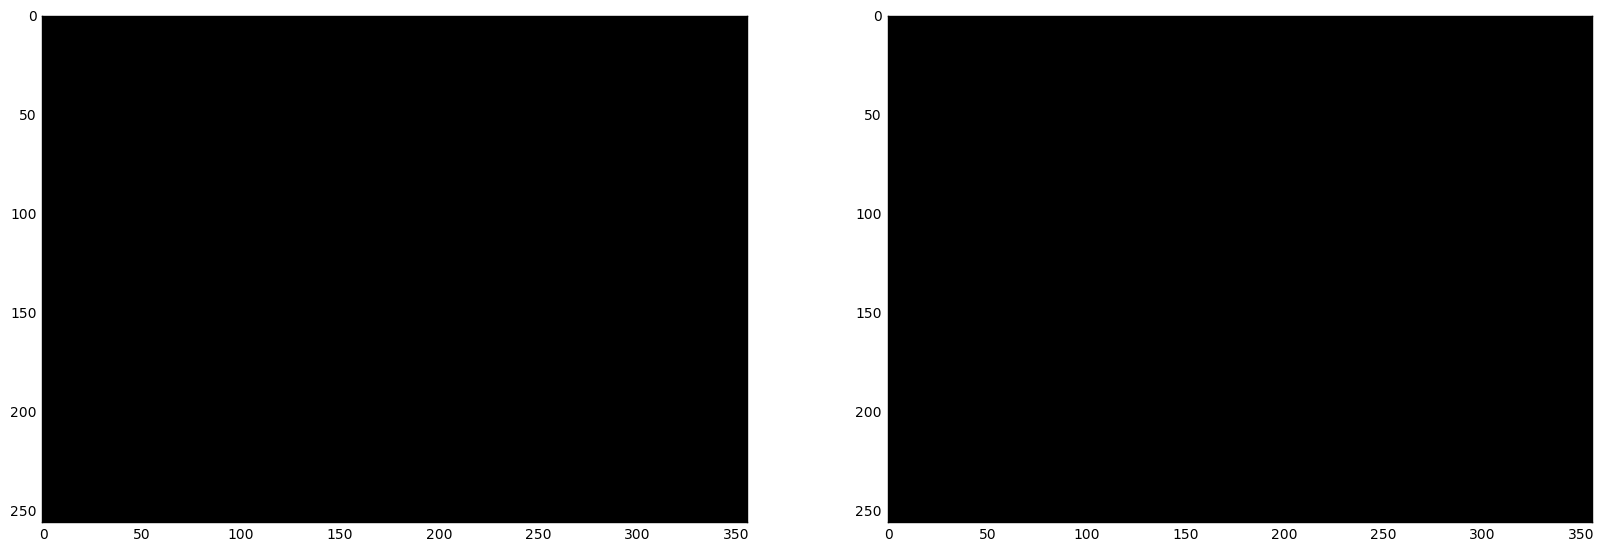

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time
out_img_data = {}
for i_img in big_image_list[0:1]:
    fig, axs = plt.subplots(1, len(backends), figsize = (20, 10))
    for c_ax, c_back in zip(axs, backends):
        stime = time()
        c_image = DiskMappedLazyImage(i_img, c_back)[0:256, 0:256]
        print(c_back, c_image.shape, "{}s for loading".format(time()-stime))
        c_ax.imshow(c_image)
        out_img_data[str(c_back)] = c_image
[mat for (_, mat) in out_img_data.items()]


# Interactive Browsing of Tiled Images

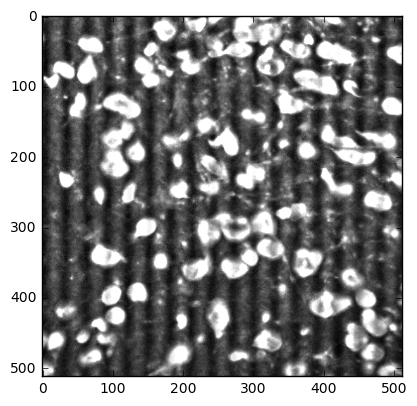

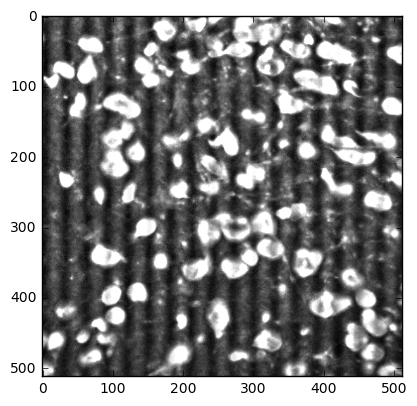

In [7]:
in_lz_image = DiskMappedLazyImage(big_image_list[0], backends[-1])
_ = viz.show_lazy_browser(in_lz_image, tile_size = (512, 512))

In [8]:
# check boundary issues for tiles
for c_ax, c_back in zip(axs, backends):
    c_image = DiskMappedLazyImage(i_img, c_back)
    for i in [0, c_image.shape[0]-20, c_image.shape[0]]:
        for j in [0, c_image.shape[1]-20, c_image.shape[1]]:
            try:
                o_shape = c_image[i:i+20, j:j+20].shape
            except:
                o_shape = 'Failed'
            print(c_back, (i,j), o_shape)

<class 'pyqae.nd.LazyImagePillowBackend'> (0, 0) (20, 20)
<class 'pyqae.nd.LazyImagePillowBackend'> (0, 364) (20, 20)
<class 'pyqae.nd.LazyImagePillowBackend'> (0, 384) Failed
<class 'pyqae.nd.LazyImagePillowBackend'> (364, 0) (20, 20)
<class 'pyqae.nd.LazyImagePillowBackend'> (364, 364) (20, 20)
<class 'pyqae.nd.LazyImagePillowBackend'> (364, 384) Failed
<class 'pyqae.nd.LazyImagePillowBackend'> (384, 0) Failed
<class 'pyqae.nd.LazyImagePillowBackend'> (384, 364) Failed
<class 'pyqae.nd.LazyImagePillowBackend'> (384, 384) Failed
<class 'pyqae.nd.LazyImageGDALBackend'> (0, 0) (20, 20)
<class 'pyqae.nd.LazyImageGDALBackend'> (0, 364) (20, 20)
<class 'pyqae.nd.LazyImageGDALBackend'> (0, 384) Failed
<class 'pyqae.nd.LazyImageGDALBackend'> (364, 0) (20, 20)
<class 'pyqae.nd.LazyImageGDALBackend'> (364, 364) (20, 20)
<class 'pyqae.nd.LazyImageGDALBackend'> (364, 384) Failed
<class 'pyqae.nd.LazyImageGDALBackend'> (384, 0) Failed
<class 'pyqae.nd.LazyImageGDALBackend'> (384, 364) Failed
<cla

In [ ]:
help(paths_to_tiled_image)

In [9]:
dist_tile_rdd = paths_to_tiled_image(little_image_list[0:1], context = sc, backend = backends[-1])

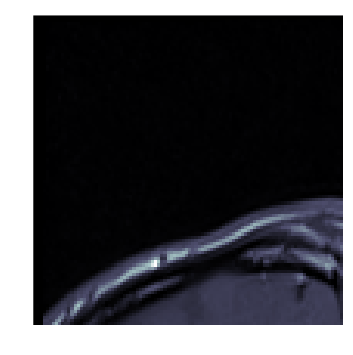

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = viz.show_image(dist_tile_rdd.unchunk()[0,0:100,0:100].toarray())

In [11]:
lazy_out_image = dist_tile_rdd.unchunk()
lazy_out_image.cache()

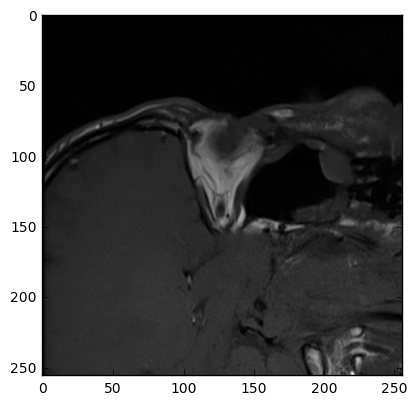

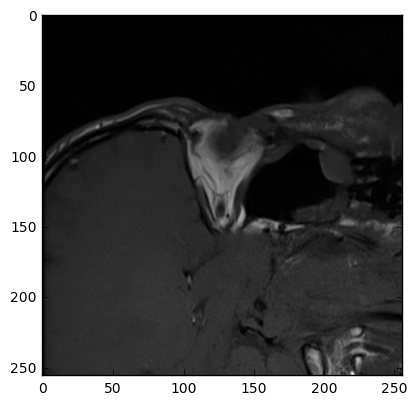

In [13]:
_ = viz.show_lazy_browser(lazy_out_image[0])

In [ ]:
# the following serves as a visualization of the tile_processing workflow

/Users/mader/anaconda/lib/python3.5/site-packages/pyqae_python-0.15-py3.5.egg/pyqae/simplespark.py:90: RuntimeWarning: Partitioning not really supported yet
/Users/mader/anaconda/lib/python3.5/site-packages/pyqae_python-0.15-py3.5.egg/pyqae/simplespark.py:94: RuntimeWarning: Partitioning not really supported yet


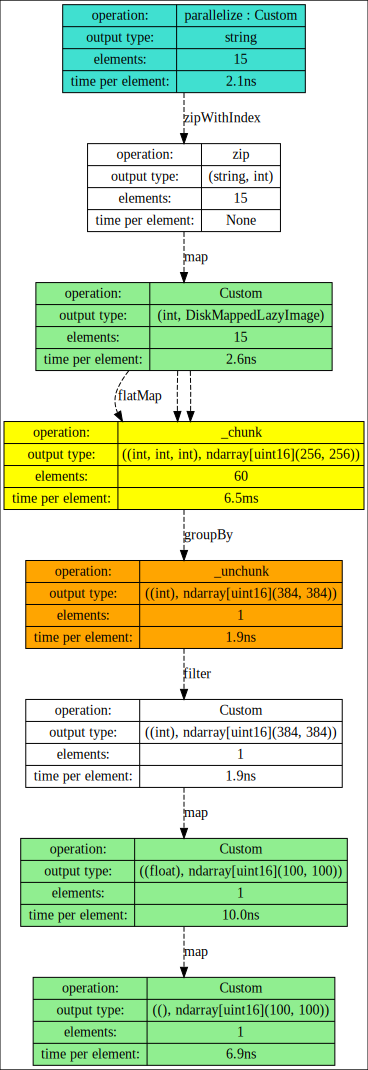

In [14]:
import pyqae.simplespark as pyspark
lsc = pyspark.LocalSparkContext()
from pyqae.rddviz import show_dag
dist_tile_rdd = paths_to_tiled_image(little_image_list, context = lsc, backend = backends[-1])
show_dag(dist_tile_rdd.unchunk()[0,0:100,0:100].tordd(), 'tile_read.svg')